In [447]:
import pandas as pd
import numpy as np

import math,datetime
import time

import matplotlib.pyplot as plt
from matplotlib import style

from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn import model_selection
from sklearn.model_selection import train_test_split


In [448]:
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
import matplotlib.pyplot as plt

In [449]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
#from datetime import datetime

df=pd.read_csv('historical_data.csv')


In [450]:
corr_matrix = df.corr()
with open('corr.npy', 'wb') as f:
    np.save(f, corr_matrix)

In [451]:
df.tail()

,Unnamed: 0,maxtempC,mintempC,uvIndex,HeatIndexC,WindGustKmph,humidity,tempC,windspeedKmph,Brent_Prices,Henry_Hub_Price,WTI_Prices,elec_price
27019,2021-06-30 19:00:00,24,17,5,23,16,70,21,10,76.94,3.79,73.52,99.97
27020,2021-06-30 20:00:00,24,17,5,21,17,75,20,9,76.94,3.79,73.52,98.97
27021,2021-06-30 21:00:00,24,17,5,20,18,81,19,9,76.94,3.79,73.52,97.02
27022,2021-06-30 22:00:00,24,17,5,18,21,80,17,11,76.94,3.79,73.52,96.01
27023,2021-06-30 23:00:00,24,17,5,16,24,80,16,12,76.94,3.79,73.52,84.36


In [452]:
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
import matplotlib.pyplot as plt

In [453]:
data = df.filter(['elec_price',])
dataset = data.values
training_data_len = math.ceil( len(dataset) * .8 )
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)



#Create the scaled training data set
train_data = scaled_data[0:training_data_len , :]
#Split the data into x_train and y_train data sets
x_trainl = []
y_trainl = []

#daily prediction
training_window = 24*7*2
prediction_time=24*1
#hourly prediction
#training_window = 24
#prediction_time=1*1
#weekly prediction
#training_window = 24*7*3
#prediction_time=24*7

for i in range(training_window, len(train_data)-prediction_time):
    x_trainl.append(train_data[i-training_window:i, 0])
    y_trainl.append(train_data[i:i+prediction_time, 0])

#Convert the x_train and y_train to numpy arrays
x_trainl, y_trainl = np.array(x_trainl), np.array(y_trainl)

#Reshape the data
x_trainl = np.reshape(x_trainl, (x_trainl.shape[0], x_trainl.shape[1], 1))
x_trainl.shape

(21260, 336, 1)

In [456]:
import pickle
scalerfile = 'uni_model_1day_scaler.sav'
pickle.dump(scaler, open(scalerfile, 'wb'))

In [454]:
model = Sequential()

model.add(LSTM(50, return_sequences=True, input_shape= (x_trainl.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(y_trainl.shape[1]))

print(model.summary())
#Compile the model
model.compile(optimizer='adam',loss='mean_squared_error')
#Train the model
lstm_start = time.time()

history = model.fit(x_trainl, y_trainl, epochs=5, batch_size=32)
lstm_end = time.time()

total_lstm = lstm_end - lstm_start
print(total_lstm)
model.save('uni_dailyModel.h5')
from keras.models import load_model
model = load_model('uni_dailyModel.h5')

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_36 (LSTM)               (None, 336, 50)           10400     
_________________________________________________________________
lstm_37 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dense_36 (Dense)             (None, 25)                1275      
_________________________________________________________________
dense_37 (Dense)             (None, 24)                624       
Total params: 32,499
Trainable params: 32,499
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/5
665/665 [==============================] - 167s 251ms/step - loss: 0.0053
Epoch 2/5
665/665 [==============================] - 216s 325ms/step - loss: 0.0025
Epoch 3/5
665/665 [==============================] - 195s 293ms/step - los

In [457]:
model.save('uni_model_1day.h5')

In [460]:
prediction_time_start = time.time()
#Create the testing data set
#Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - training_window: , :]
#Create the data sets x_test and y_test
x_testl = []
y_testl = dataset[training_data_len:, :]
for i in range(training_window, len(test_data)):
    x_testl.append(test_data[i-training_window:i, :])
#Convert the data to a numpy array
x_testl = np.array(x_testl)
#Reshape the data
x_testl = np.reshape(x_testl, (x_testl.shape[0], x_testl.shape[1], -1 ))
#Get the models predicted price values 
predictionsl = model.predict(x_testl)
print(predictionsl)
predictionsl = scaler.inverse_transform(predictionsl)
print(predictionsl)
prediction_time_end = time.time()
total_time=prediction_time_end-prediction_time_start
total_time
#total_time_wekly_pred=18.5s
#total_time_daily_pred=8.8s

[[0.4575797  0.4353316  0.42440847 ... 0.4624414  0.456034   0.45348266]
 [0.4429185  0.41555324 0.40859988 ... 0.46288428 0.45354813 0.45083568]
 [0.4207014  0.39226025 0.3924682  ... 0.4551321  0.4444369  0.43994123]
 ...
 [0.66568834 0.6268363  0.60368705 ... 0.632493   0.62225795 0.62310886]
 [0.6315501  0.57950497 0.5705153  ... 0.6425491  0.6241011  0.6194256 ]
 [0.60277086 0.54807734 0.5527016  ... 0.6412808  0.6196622  0.6076726 ]]
[[ 47.76635   41.520645  38.45419  ...  49.13118   47.332428  46.616188]
 [ 43.650513  35.96826   34.016243 ...  49.255505  46.634567  45.8731  ]
 [ 37.41351   29.42922   29.4876   ...  47.079235  44.076775  42.8147  ]
 ...
 [106.18868   95.28175   88.78306  ...  96.86976   93.99647   94.23535 ]
 [ 96.60505   81.99442   79.47075  ...  99.6928    94.5139    93.20135 ]
 [ 88.52586   73.17175   74.46992  ...  99.33675   93.26778   89.90192 ]]


14.392836093902588

In [461]:
x_testl

array([[[0.43568553],
        [0.40804332],
        [0.40886261],
        ...,
        [0.45574039],
        [0.46553628],
        [0.45688028]],

       [[0.40804332],
        [0.40886261],
        [0.39258362],
        ...,
        [0.46553628],
        [0.45688028],
        [0.44362911]],

       [[0.40886261],
        [0.39258362],
        [0.3900545 ],
        ...,
        [0.45688028],
        [0.44362911],
        [0.42054643]],

       ...,

       [[0.64663556],
        [0.6007908 ],
        [0.52523777],
        ...,
        [0.64449827],
        [0.64353649],
        [0.63997435]],

       [[0.6007908 ],
        [0.52523777],
        [0.52352795],
        ...,
        [0.64353649],
        [0.63997435],
        [0.63302818]],

       [[0.52523777],
        [0.52352795],
        [0.52253055],
        ...,
        [0.63997435],
        [0.63302818],
        [0.62943041]]])

In [462]:
#Create the testing data set
#Create a new array containing scaled values from index 1543 to 2002 
#test_data = scaled_data[training_data_len - training_window: , :]
#Create the data sets x_test and y_test
#x_testl = []
#y_testl = dataset[training_data_len:, :]
#x_testl.append(test_data[0:training_window, :])
#Convert the data to a numpy array
#x_testl = np.array(x_testl)



#for i in range(24*7):
 #   x_test = np.array(x_testl)
  #  #Reshape the data
#    x_test = np.reshape(x_testl, (x_testl.shape[0], x_testl.shape[1], -1 ))
 #   #Get the models predicted price values 
  #  prediction = model.predict(x_test)
   # #prediction = scaler.inverse_transform(prediction)
    #x_testl=np.roll(x_test,-1)
    #x_testl[0,-1]=prediction[0][0]
    
    

In [463]:
#predictionsl=scaler.inverse_transform(x_testl[0,:])
#y_testl = dataset[-24*7:, :]

In [464]:
#Get the root mean squared error (RMSE)
rmse=np.sqrt(np.mean(((predictionsl - y_testl)**2)))
rmse

17.685305242499144

In [465]:
from sklearn.metrics import mean_squared_error
rr = mean_squared_error(y_testl, predictionsl)
#mse = sklearn.metrics.mean_squared_error(y_testl, predictionsl)

rmse1 = math.sqrt(rr)

print(rmse1)
#rmse_weekly_prediction_each_hour=11.97
#rmse_daily_prediction_each_hour=7.9

ValueError: y_true and y_pred have different number of output (1!=24)

Visualizing Results of LSTM Model

<ipython-input-427-ba6a560276c2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictionsl


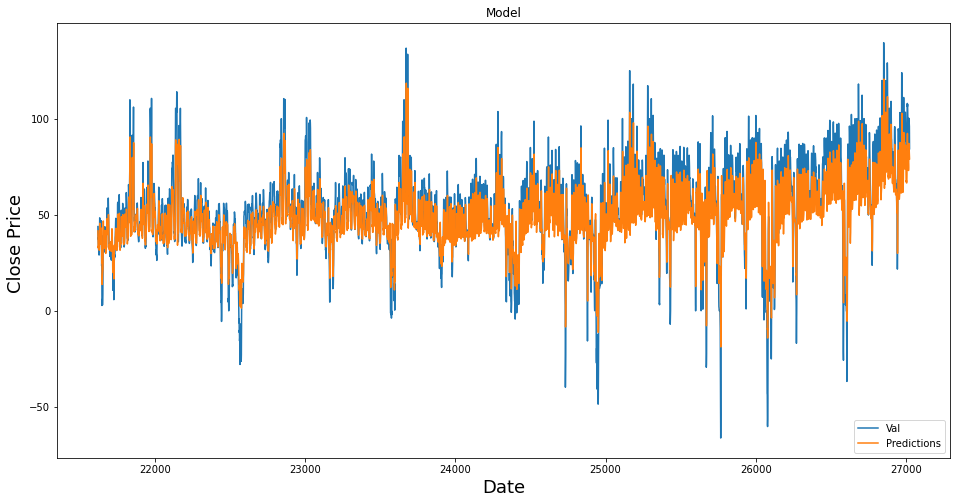

In [427]:
#Plot the data
#train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictionsl
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price ', fontsize=18)
#plt.plot(train['elec_price'])
plt.plot(valid[['elec_price', 'Predictions']])
plt.legend([ 'Val', 'Predictions'], loc='lower right')
plt.savefig('zoom')
plt.show()

In [428]:

#to predict one day
#model.predict(x_testl[-24:]).shape
#to predict 1 week
#model.predict(x_testl[-24*7:]).shape

(24, 1)

In [429]:
x_testl[-24*7:].shape

(168, 168, 1)

In [251]:
x_testl[-24*7:].shape

(168, 504, 1)

# Multivariate

In [473]:
df=pd.read_csv('historical_data.csv')
forecast_Col = 'elec_price'
df['label'] = df[forecast_Col].shift(-7*24)
df_features = df[['elec_price','tempC','windspeedKmph','Brent_Prices','Henry_Hub_Price','WTI_Prices','label']]

df_features.dropna(inplace=True)
df_features.tail()

<ipython-input-473-e64a42fae7bf>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_features.dropna(inplace=True)


,elec_price,tempC,windspeedKmph,Brent_Prices,Henry_Hub_Price,WTI_Prices,label
26851,139.55,16,11,75.795584,3.305846,73.204890,99.97
26852,133.20,16,10,75.827389,3.303697,73.222023,98.97
26853,112.34,15,9,75.858733,3.302039,73.241101,97.02
26854,93.35,15,10,75.889616,3.300869,73.262123,96.01
26855,86.34,14,10,75.920039,3.300190,73.285090,84.36


In [475]:
n = len(df_features)
train_df = df_features[0:int(n/0.7)]
val_df = df_features[int(n*0.7):int(n*0.9)]
test_df = df_features[int(n*0.9):]



In [476]:
train_df

,elec_price,tempC,windspeedKmph,Brent_Prices,Henry_Hub_Price,WTI_Prices,label
0,42.34,20,5,74.540000,2.910000,65.810000,43.02
1,38.89,20,4,74.531092,2.909331,65.748064,43.24
2,38.82,20,3,74.521994,2.908674,65.687461,42.53
3,38.45,19,3,74.512704,2.908027,65.628193,42.09
4,38.62,20,5,74.503223,2.907392,65.570258,42.53
...,...,...,...,...,...,...,...
26851,139.55,16,11,75.795584,3.305846,73.204890,99.97
26852,133.20,16,10,75.827389,3.303697,73.222023,98.97
26853,112.34,15,9,75.858733,3.302039,73.241101,97.02
26854,93.35,15,10,75.889616,3.300869,73.262123,96.01


In [477]:
scaler1 = StandardScaler()

scaler1.fit(train_df.filter(['label']))
scaled_labels= pd.DataFrame(scaler1.transform(train_df.filter(['label'])), columns=[ 'label'])

In [478]:

scaler = StandardScaler()

scaler.fit(train_df)


scaled_train_df = pd.DataFrame(scaler.transform(train_df), 
                               columns=['elec_price', 'tempC', 'windspeedKmph', 'Brent_Prices', 'Henry_Hub_Price', 'WTI_Prices', 'label'])
scaled_val_df = pd.DataFrame(scaler.transform(val_df),
                               columns=['elec_price', 'tempC', 'windspeedKmph', 'Brent_Prices', 'Henry_Hub_Price', 'WTI_Prices', 'label'])
scaled_test_df = pd.DataFrame(scaler.transform(test_df),
                               columns=['elec_price', 'tempC', 'windspeedKmph', 'Brent_Prices', 'Henry_Hub_Price', 'WTI_Prices', 'label'])


train_X = scaled_train_df.drop(['label'], axis=1)
val_X = scaled_val_df.drop(['label'], axis=1)
test_X = scaled_test_df.drop(['label'], axis=1)

display(train_X)
train_y = scaled_train_df['label']
val_y = scaled_val_df['label']
test_y = scaled_test_df['label']
train_y

,elec_price,tempC,windspeedKmph,Brent_Prices,Henry_Hub_Price,WTI_Prices
0,0.081319,1.139174,-1.255489,1.101780,0.320949,0.929210
1,-0.095951,1.139174,-1.398378,1.101172,0.320242,0.924586
2,-0.099547,1.139174,-1.541267,1.100551,0.319546,0.920061
3,-0.118559,1.010854,-1.541267,1.099916,0.318862,0.915636
4,-0.109824,1.139174,-1.255489,1.099269,0.318189,0.911310
...,...,...,...,...,...,...
26851,5.076209,0.625892,-0.398154,1.187511,0.739828,1.481338
26852,4.749930,0.625892,-0.541043,1.189683,0.737555,1.482617
26853,3.678092,0.497572,-0.683932,1.191823,0.735799,1.484042
26854,2.702339,0.497572,-0.541043,1.193932,0.734562,1.485611


0        0.101546
1        0.112652
2        0.076809
3        0.054597
4        0.076809
           ...   
26851    2.976550
26852    2.926067
26853    2.827625
26854    2.776638
26855    2.188511
Name: label, Length: 26856, dtype: float64

In [471]:
train_X = np.asarray(train_X)
val_X = np.asarray(val_X)
test_X = np.asarray(test_X)
train_y = np.asarray(train_y)
val_y = np.asarray(val_y)
test_y = np.asarray(test_y)
print(len(train_X))
print(len(val_X))
print(len(test_X))


26856
5371
2686


In [472]:
# convert data to sequences of data for LSTM

X_train = []
y_train = []
X_val = []
y_val = []
X_test = []
y_test = []

seq_len = 6*24
predict_future=1

for i in range(seq_len, len(train_data)-predict_future):
    X_train.append(train_X[i-seq_len:i, 0])
    y_train.append(train_y[i:i+predict_future, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

print(X_train.shape, y_train.shape)

for i in range(seq_len,len(val_X) - predict_future):
    X_val.append(val_X[i-seq_len:i, 0])
    y_val.append(val_y[i:i+predict_future, 0])
X_val, y_val = np.array(X_val), np.array(y_val)

print(X_val.shape, y_val.shape)


for i in range(len(test_X) - seq_len):
    X_test.append(test_X[i-seq_len:i, 0])
    y_test.append(test_y[i:i+predict_future, 0])
X_test, y_test = np.array(X_test), np.array(y_test)

print(X_test.shape, y_test.shape)
X_train.shape[1]

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [268]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# 51% accuracy on test set
# model = tf.keras.models.Sequential([
#     tf.keras.layers.LSTM(64, return_sequences=True),#, activation=tf.nn.sigmoid),
#     tf.keras.layers.Dropout(.25),
    
#     tf.keras.layers.LSTM(32, return_sequences=True),# activation=tf.nn.relu),
#     tf.keras.layers.Dropout(.25),
    
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(16, activation=tf.nn.relu),
#     tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)
# ])

# 55% accuracy on val set, 54% accuracy on test set
model = Sequential()

model.add(LSTM(68, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(Dropout(0.15))
model.add(LSTM(50, return_sequences= False))
model.add(Dropout(0.3))
model.add(Dense(25))
model.add(Dense(1))

# 54% accuracy on val set, 56% accuracy on test set (pred 1 9x)
# model = tf.keras.models.Sequential([
#     tf.keras.layers.LSTM(5, return_sequences=False),
#     tf.keras.layers.Dropout(.4),
    
#     tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)
# ])


model.compile(optimizer='adam',loss='mean_squared_error')
history = model.fit(X_train, y_train, epochs=5, batch_size=32)

# early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose = 1, patience = 9, restore_best_weights = False)

# model.compile(loss = "mse", optimizer = tf.keras.optimizers.Adam(), metrics=['mse'])
# model.compile(loss = tf.keras.losses.BinaryCrossentropy(), optimizer = tf.keras.optimizers.Adam(), metrics=['mse'])

# history = model.fit(X_train, y_train, verbose=1, epochs=20, batch_size=50, validation_data=(X_val, y_val), callbacks = [early_stopping])

Epoch 1/5
838/838 [==============================] - 26s 31ms/step - loss: 0.5930
Epoch 2/5
838/838 [==============================] - 25s 30ms/step - loss: 0.4966
Epoch 3/5
838/838 [==============================] - 26s 31ms/step - loss: 0.4492
Epoch 4/5
838/838 [==============================] - 26s 31ms/step - loss: 0.4095
Epoch 5/5
838/838 [==============================] - 26s 31ms/step - loss: 0.3779


In [269]:
y_train.shape

(26816,)

In [270]:
# model architecture
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_18 (LSTM)               (None, 40, 68)            20400     
_________________________________________________________________
dropout_2 (Dropout)          (None, 40, 68)            0         
_________________________________________________________________
lstm_19 (LSTM)               (None, 50)                23800     
_________________________________________________________________
dropout_3 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_18 (Dense)             (None, 25)                1275      
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 26        
Total params: 45,501
Trainable params: 45,501
Non-trainable params: 0
__________________________________________________

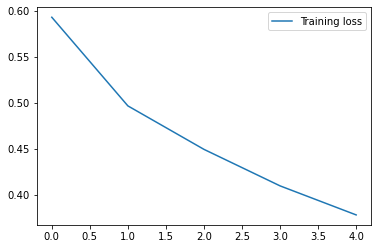

In [271]:
# history = model.fit(X, y, epochs=30, batch_size=48, validation_split=0.3, verbose=1)

plt.plot(history.history['loss'], label='Training loss')
# plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

In [272]:
import math
from sklearn.metrics import accuracy_score, mean_squared_error

# function for displaying model evaluation scores
def eval_metrics(y_actual, y_predict, dataset):
    print("\nEvaluation metrics for " + dataset + ":\n")
    print("Accuracy score is: %.2f" % accuracy_score(y_actual, y_predict))
    print("Mean Squared Error: %.3f" % mean_squared_error(y_actual, y_predict))
    print("Root Mean Squared Error: %.3f" % math.sqrt(mean_squared_error(y_actual, y_predict)))
    print("-----------------------------------------")
    

In [273]:
df_train

NameError: name 'df_train' is not defined

In [ ]:
X_test.shape

(2646, 1)
(2646,)


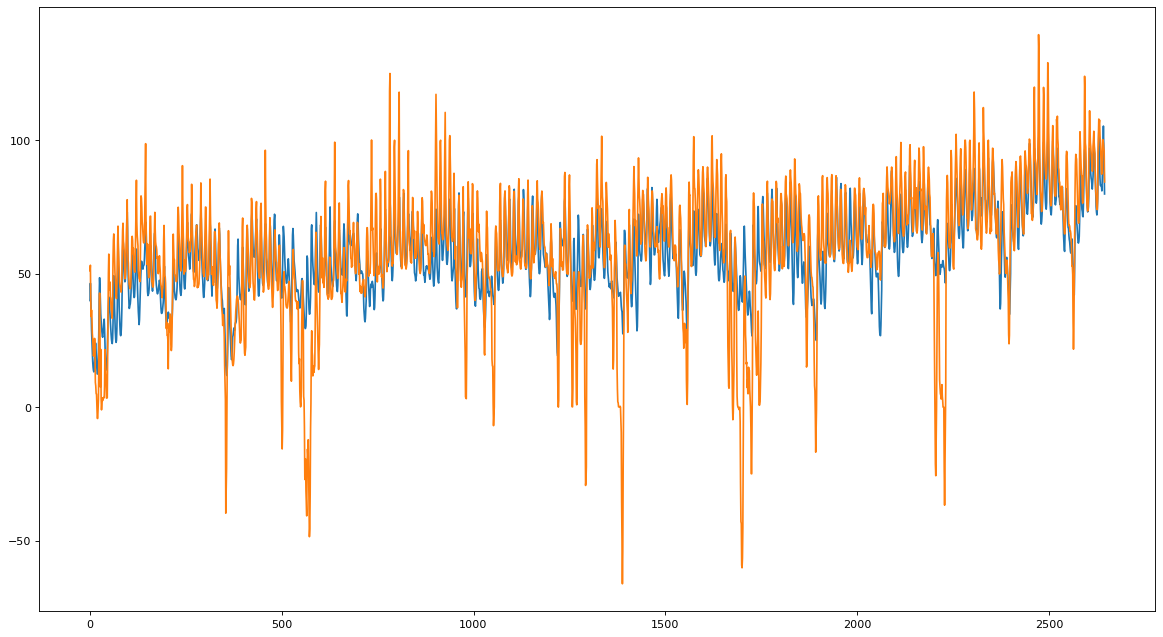

In [274]:
# scaler.inverse_transform()

import matplotlib.pyplot as plt

predictions = model.predict(X_test)
print(predictions.shape)
print(y_test.shape)
predictions = scaler1.inverse_transform(predictions)
y_test=scaler1.inverse_transform(y_test)
# max_dict = {key: max(results[key]) for key in results.keys()}

plt.figure(figsize=(18,10), dpi=80)
plt.plot(range(len(predictions)), predictions)
plt.plot(range(len(y_test)) , y_test )
plt.show()
# plt.plot(*zip(*max_dict.items()))
# plt.xlabel("time range")
# plt.ylabel("most increase factor")
# plt.show
# plt.savefig("stocknet_analysis")



In [275]:
print("Mean Squared Error: %.3f" % mean_squared_error(y_test, predictions))


Mean Squared Error: 287.017


In [208]:
X_train.shape

(26816, 40, 6)